# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(104, 'ECONNRESET')",))': /simple/tensorboard/
tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
"""env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))"""

"env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (for each agent)\n    states = next_states                               # roll over states to next time

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

## Import necessary functions

In [7]:
import numpy as np
import random
import copy
from collections import namedtuple, deque
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
  


## Define actor model

In [8]:

# function to initialize weights of hidden layers
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)


class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=128, fc2_units= 128, use_batchn = True):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.use_batchn = use_batchn
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        if self.use_batchn:
            self.bn0 = nn.BatchNorm1d(state_size)
            self.bn1 = nn.BatchNorm1d(fc1_units)
            self.bn2 = nn.BatchNorm1d(fc2_units)
        self.reset_parameters()

    def reset_parameters(self):        
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        #self.fc1.bias.data.fill_(0.1)
        #self.fc2.bias.data.fill_(0.1)
        #self.fc3.bias.data.fill_(0.1)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        if self.use_batchn:
            x = self.bn0(state)
            x = F.relu(self.bn1(self.fc1(x)))
            x = F.relu(self.bn2(self.fc2(x)))
            x = torch.tanh(self.fc3(x))
        else:
            x = F.relu(self.fc1(state))
            x = F.relu(self.fc2(x))
            x = torch.tanh(self.fc3(x))
            
        return x

## Define critic model

In [9]:
class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=128, fc2_units=128, use_batchn = True):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.use_batchn = use_batchn
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        if self.use_batchn:
            self.bn0 = nn.BatchNorm1d(state_size)
            #self.bn1 = nn.BatchNorm1d(fc1_units)
        self.reset_parameters()

    def reset_parameters(self):     
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        #self.fcs1.bias.data.fill_(0.1)
        #self.fc2.bias.data.fill_(0.1)
        #self.fc3.bias.data.fill_(0.1)
        
    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        if self.use_batchn:
            x = self.bn0(state)
            xs = F.relu(self.fcs1(state))
            x = torch.cat((xs, action), dim =1)
            x = F.relu(self.fc2(x))
        else:
            x = F.relu(self.fcs1(state))
            x = torch.cat((x, action), dim = 1)
            x = F.relu(self.fc2(x))
        
        return self.fc3(x)
        


## Define agent

In [10]:
# Define agent hyperparameters
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99           # discount factor
TAU = 1e-3             # for soft update of target parameters
LR_ACTOR = 1e-3        # learning rate of the actor 
LR_CRITIC = 1e-3      # learning rate of the critic
WEIGHT_DECAY = 0.00        # L2 weight decay
UPDATE_TARGET_FREQ = 1
EPSILON = 1
EPSILON_DECAY = 1e-6
PRIORITIZED_REPLAY = False
retrain = False

# check if gpu is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# define agent
class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed, epsilon=EPSILON, epsilon_decay=EPSILON_DECAY, prioritized_replay = PRIORITIZED_REPLAY):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.learn_step=0
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.prioritized_replay = prioritized_replay


        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        
        # Noise process
        self.noise = OUNoise(action_size, random_seed)

        # Replay memory
        if self.prioritized_replay:
            self.memory = Prio_ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed, prioritized_replay=True)
        else:
            self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)

        
        self.hard_update(self.actor_target, self.actor_local)
        self.hard_update(self.critic_target, self.critic_local)
    
    def step(self, states, actions, rewards, next_states, dones, timestep, ddpg_20 = True):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        if ddpg_20 == False:
            self.memory.add(states, actions, rewards, next_states, dones)
        
            # Learn, if enough samples are available in memory
            if len(self.memory) > BATCH_SIZE and timestep % 20 == 0:
                for _ in range(10):
                    experiences = self.memory.sample()
                    self.learn(experiences, GAMMA)
            
        else:
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                self.memory.add(state, action, reward, next_state, done)

            # Learn, if enough samples are available in memory
            if len(self.memory) > BATCH_SIZE and timestep % 20 == 0:
                for _ in range(10):
                    experiences = self.memory.sample()
                    self.learn(experiences, GAMMA)    
            
    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.epsilon * self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        self.learn_step+=1
        
        if self.prioritized_replay:
            states, actions, rewards, next_states, dones, indices, weights = experiences
        else:
            states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        # Get TD-Error
        loss = F.mse_loss(Q_expected, Q_targets)
        
        if self.prioritized_replay:
            priorities = np.sqrt(loss.detach().cpu().data.numpy())
            self.memory.update_priorities(indices, priorities)
            loss = loss * weights
            critic_loss = loss.mean()
        
        
        # Minimize the loss     
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)
        
        if self.learn_step == 1:
            self._copy_weights(self.critic_local, self.critic_target)
            self._copy_weights(self.actor_local, self.actor_target)
        else:
            if self.learn_step % UPDATE_TARGET_FREQ == 0:
                self.soft_update(self.critic_local, self.critic_target, TAU)
                self.soft_update(self.actor_local, self.actor_target, TAU)  
                
        # ----------------------- reset noise ----------------------- #
        self.epsilon = max(self.epsilon - self.epsilon_decay, 0)
        self.noise.reset()
                
    def _copy_weights(self, source_network, target_network):
        """Copy source network weights to target"""        
        for target_param, source_param in zip(target_network.parameters(), source_network.parameters()):
            target_param.data.copy_(source_param.data)


    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
    def hard_update(self, target, source):
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.01):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        #self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

In [11]:
#Normal Replay Buffer
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [12]:
#PER Replay Buffer
class Prio_ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, prioritized_replay=True):
        """Initialize a ReplayBuffer object.
        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
            prioritized_replay (bool): use prioritized replay buffer when 'True'
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple('Experience', field_names=['state', 'action', 'reward', 'next_state', 'done'])
        self.seed = random.seed(seed)
        self.prioritized_replay = prioritized_replay
        if self.prioritized_replay:
            self.priorities = np.ones((buffer_size,), dtype=np.float32)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        # """Randomly select a batch of experiences from memory."""
        """Select a batch of experiences from memory, either randomly or from priorities."""
        if self.prioritized_replay:
            probs = np.power(self.priorities[:len(self.memory)], 0.6)
            probs /= probs.sum()
            indices = np.random.choice(len(self.memory), self.batch_size, p=probs)
            experiences = [self.memory[idx] for idx in indices]
        else: 
            experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        if self.prioritized_replay:
            weights = np.power(len(self.memory) * probs[indices], -0.4)
            weights /= weights.max()
            weights = torch.from_numpy(weights).float().to(device)
            return (states, actions, rewards, next_states, dones, indices, weights)
        else:
            return (states, actions, rewards, next_states, dones)

    # For updating replay priorities
    def update_priorities(self, indices, priorities):
        for idx in indices:
            self.priorities[idx] = priorities

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

## Initialize agent

In [13]:
#agent for one arm environment
def ddpg_one(n_episodes=1000, max_t=30000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations[0]   
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0] 
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done, t)
            state = next_state
            score += reward
            
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tMin: {:.2f}\tMax: {:.2f}\tEpsilon: {:.2f}'.format(i_episode, np.mean(scores_deque), score, np.min(scores), np.max(scores), agent.epsilon),end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            
    return scores

In [14]:
#agent for 20 arm environment
def ddpg_20(n_episodes=5000, max_t=30000, print_every=20):
    scores_deque = deque(maxlen=(print_every*5))
    scores_global = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations
        
        scores = np.zeros(num_agents) 
        agent.reset()
        average = 0
        step = 0
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name] 
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states
            scores += rewards
            step+=1
            
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_deque.append(score)
        score_average = np.mean(scores_deque)
        scores_global.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tMin: {:.2f}\tMax: {:.2f}\tEpsilon: {:.2f}\tt: {}'.format(i_episode, score_average, score, np.min(scores_deque), np.max(scores_deque), agent.epsilon, step),end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_new.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_new.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            
    return scores_global, scores_deque

## Train agent 

In [15]:
agent = Agent(state_size, action_size, 1234)

#scores = ddpg_one()
scores, scores_deque = ddpg_20()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:141: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode 20	Average Score: 1.95	Score: 4.74	Min: 0.53	Max: 4.74	Epsilon: 0.99	t: 1001
Episode 40	Average Score: 4.80	Score: 8.48	Min: 0.53	Max: 9.55	Epsilon: 0.98	t: 1001
Episode 60	Average Score: 7.01	Score: 14.06	Min: 0.53	Max: 14.06	Epsilon: 0.97	t: 1001
Episode 80	Average Score: 8.84	Score: 13.61	Min: 0.53	Max: 16.75	Epsilon: 0.96	t: 1001
Episode 100	Average Score: 10.21	Score: 16.59	Min: 0.53	Max: 17.21	Epsilon: 0.95	t: 1001
Episode 120	Average Score: 13.31	Score: 18.92	Min: 5.29	Max: 19.58	Epsilon: 0.94	t: 1001
Episode 140	Average Score: 16.14	Score: 24.97	Min: 9.30	Max: 25.63	Epsilon: 0.93	t: 1001
Episode 160	Average Score: 18.78	Score: 25.25	Min: 12.45	Max: 27.77	Epsilon: 0.92	t: 1001
Episode 180	Average Score: 21.32	Score: 25.26	Min: 13.86	Max: 30.55	Epsilon: 0.91	t: 1001
Episode 200	Average Score: 23.09	Score: 23.07	Min: 15.49	Max: 30.55	Epsilon: 0.90	t: 1001
Episode 220	Average Score: 24.84	Score: 32.93	Min: 16.68	Max: 32.93	Epsilon: 0.89	t: 1001
Episode 240	Average Score: 27

## Plot and save results

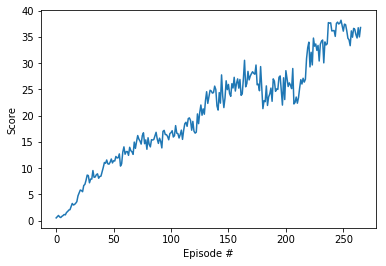

In [17]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("Plot of results_solution")
plt.show()

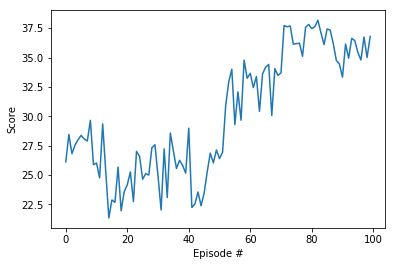

In [18]:
# plot the last 100 scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_deque)), scores_deque)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("Plot of last 100 episodes")
plt.show()

## Save results to zip file

In [ ]:
#!tar cvfz Solution.tar.gz *